In [199]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [200]:
data_b_NO2=pd.read_excel("/content/SO2_Data.xlsx",sheet_name='London')

In [201]:
check=pd.read_excel("/content/check_SO2.xlsx")

In [202]:
check.head()

,Annual_Mean,Band
0,1,Low
1,2,Low
2,3,Low
3,4,Low
4,5,Low


In [203]:
df_b_NO2=data_b_NO2.groupby('Year').agg(SO2_London=('Annual_Mean', 'mean')).reset_index()
df_b_NO2.head()

,Year,SO2_London
0,2000,7.636364
1,2001,7.000000
2,2002,5.750000
3,2003,6.833333
4,2004,4.750000


In [204]:
year=df_b_NO2['Year']
y_test=df_b_NO2['SO2_London']

In [208]:
X_train = check.drop(columns=['Band'])
y_train = check['Band']

In [209]:
import numpy as np

# Convert X_test from pandas Series to numpy array
year_array = year.to_numpy()

# Reshape X_test from 1D to 2D array
year_array_reshaped = year_array.reshape(-1, 1)


In [210]:
import numpy as np

# Convert X_test from pandas Series to numpy array
Y_test_array = y_test.to_numpy()

# Reshape X_test from 1D to 2D array
Y_test_reshaped = Y_test_array.reshape(-1, 1)

In [211]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(Y_test_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [212]:
svm_classifier = SVC(kernel='linear', C=2.0)

In [213]:
svm_classifier.fit(X_train, y_train)

SVC(C=2.0, kernel='linear')

In [214]:
y_pred = svm_classifier.predict(X_test)

In [215]:
y_pred

array(['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low'], dtype=object)

In [216]:
df_b_NO2

,Year,SO2_London
0,2000,7.636364
1,2001,7.000000
2,2002,5.750000
3,2003,6.833333
4,2004,4.750000
5,2005,4.583333
6,2006,4.500000
7,2007,3.666667
8,2008,4.166667
9,2009,3.666667


In [217]:
classified_df=pd.DataFrame()

In [218]:
classifed_df=df_b_NO2[['Year','SO2_London']]

In [219]:
band = 'Checkpoints'
classifed_df[band] = y_pred

In [220]:
classifed_df

,Year,SO2_London,Checkpoints
0,2000,7.636364,Low
1,2001,7.000000,Low
2,2002,5.750000,Low
3,2003,6.833333,Low
4,2004,4.750000,Low
5,2005,4.583333,Low
6,2006,4.500000,Low
7,2007,3.666667,Low
8,2008,4.166667,Low
9,2009,3.666667,Low


<ipython-input-221-560ee4462e0b>:10: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(x='Year', y='SO2_London', hue='Checkpoints', data=classifed_df, s=100, marker='X', palette=['green','yellow'])


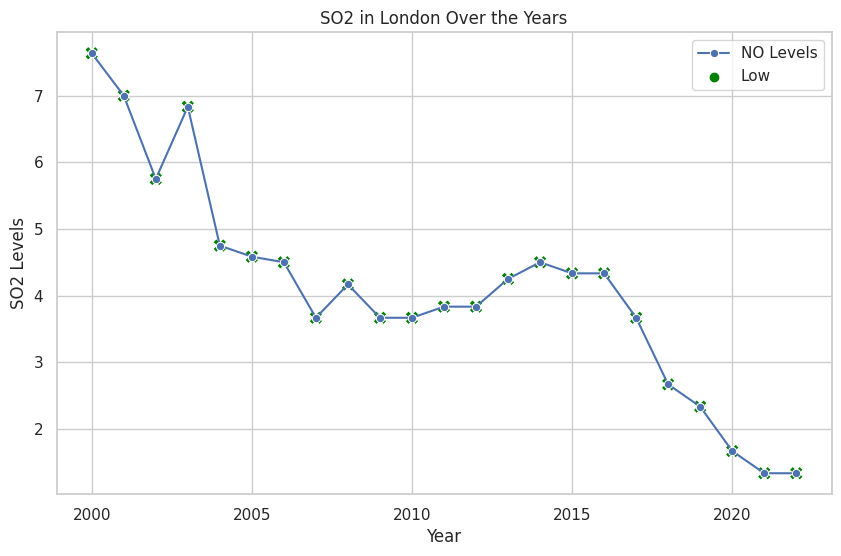

In [221]:
# Convert the 'Year' column to a proper datetime format


# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a line plot for NO2 levels over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='SO2_London', data=classifed_df, marker='o', label='NO Levels')
sns.scatterplot(x='Year', y='SO2_London', hue='Checkpoints', data=classifed_df, s=100, marker='X', palette=['green','yellow'])
plt.xlabel('Year')
plt.ylabel('SO2 Levels')
plt.title('SO2 in London Over the Years')
plt.legend()
plt.show()


In [222]:
from google.colab import files

In [223]:
csv_file_path = '/content/classified_London_SO2.csv'
classifed_df.to_csv(csv_file_path, index=True)

In [224]:
files.download(csv_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>